In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as cx

import sys
sys.path.append('src')
import utils

# Postfire Erosion Exploration: Coon Creek, AZ, Carr Fire, CA, & Hayman, CO

# Objectives:
1) __Develop & test hypotheses about controls of postfire erosion in different geographies__
2) __Evaluate observational data__
3) __Evaluate and compare model results__

# Postfire Locations:

![Fire locations map](src/assets/locations.png)

__Coon Creek Fire (2000) & Workman Creek__:

- General Site Characteristics: bimodal rainfall (800 mm/yr), summers dominated by monsoons, ephemeral snowpacks in winter, quartzite bedrock,~ 2100m, main fork (~1/2 of area) high severity with low moderate in other sub watersheds.

__Hayman Creek Fire (2002) & Saloon Gulch__: 

- General Site Characteristics: arid (~ 400 mm/yr), dominated by monsoons, granite, ~ 2400m. High severity fire in upper reaches, unburned in lower.
  
__Carr Fire (2018) & Brandy, Boulder, and Whiskey Creeks__:

-  General Site Characteristics: mediterranean climate (~1650 mm/yr), wet winters hot dry summers, granite & volcanic, ~ 300-1800+ m
![Table 1](src/assets/Tbl1_East_2021.png)

# Observational Data

In [2]:
obs = pd.read_csv('src/observations.csv')

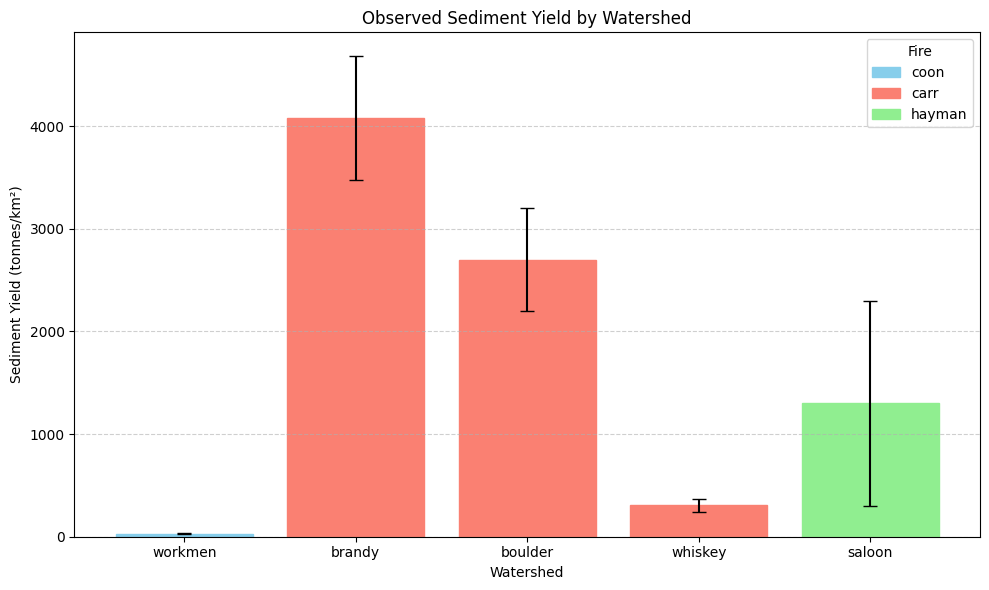

In [3]:
utils.plot_observed_sediment_yield()

__Does this meet our expectation/hypotheses?__

__Questions:__
1) Does it make sense that Workmen Creek is so low?
2) Is there something special about the Carr Fire watersheds?
3) Why is Whiskey Creek SY so low, while Boulder Creek SY is high?

# WEPP Model Results

Model setup:
- Standard setup for disturbed postfire conditions:
- Used soil burn severity maps from MTBS
- Simulated for ~ length of observational period
- Daymet meterolgical forcing (1km resolution, refined by PRSIM to 800m)
- Clipped hillsopes to 300m (prevents bias towards higer SY)
- Otherwise used default settings

In [4]:
coon_df, hayman_df, carr_dfs, carr_ws, area_dict = utils.load_fire_data()
modeled_sed_yield, fire_names = utils.compute_sediment_yield(coon_df, hayman_df, carr_dfs, carr_ws, area_dict)

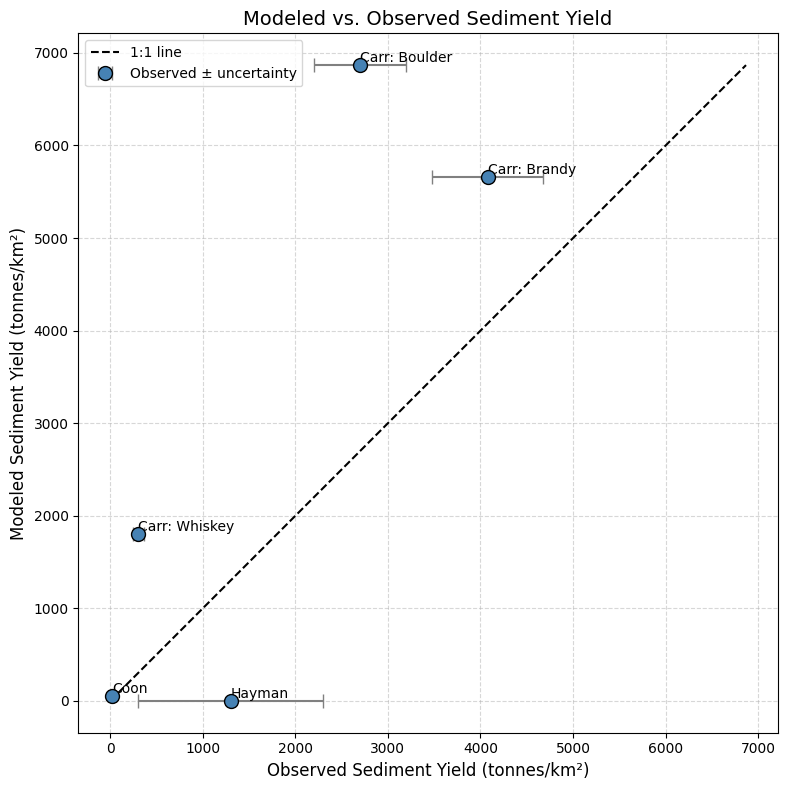

In [5]:
utils.plot_modeled_vs_observed(modeled_sed_yield)

### What can we say about the overall performance of WEPP?

# Site Specific Details

## Hayman Fire: Saloon Gulch

In [6]:
utils.interactive_hayman_plot(hayman_df)

interactive(children=(Dropdown(description='Variable:', options=('Julian', 'Water Year', 'WaterYear', 'Sed Del…

In [7]:
utils.interactive_hayman_map()

interactive(children=(Dropdown(description='Attribute:', options=('TopazID', 'WeppID', 'slope_scalar', 'length…

## Coon Creek Fire: Workman Creek

In [8]:
utils.interactive_coon_plot(coon_df)

interactive(children=(Dropdown(description='Variable:', options=('Julian', 'Water Year', 'WaterYear', 'Sed Del…

In [9]:
utils.interactive_coon_map()

interactive(children=(Dropdown(description='Attribute:', options=('TopazID', 'WeppID', 'slope_scalar', 'length…

## Carr Fire

In [10]:
utils.interactive_carr_plot(carr_dfs, carr_ws)

interactive(children=(Dropdown(description='Watershed:', options=('brandy', 'boulder', 'whiskey'), value='bran…

In [14]:
utils.interactive_carr_map()

interactive(children=(Dropdown(description='Watershed:', options=('brandy', 'boulder', 'whiskey'), value='bran…